In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [17]:
# Let's select events where both muons are global muons:
os = df[df.Q1 != df.Q2]
# Calculate the invariant mass:
m = np.sqrt(2*os['pt1']*os['pt2']*(np.cosh(os['eta1']-os['eta2']) - np.cos(os['phi1']-os['phi2'])))

nbins = 100
xmin = 2
xmax = 102
weights = [nbins/np.log(10)/m for m in m]
m = np.log10(m)

M_hist = np.histogram(m, bins=nbins, weights=weights, range=(np.log10(xmin), np.log10(xmax)))

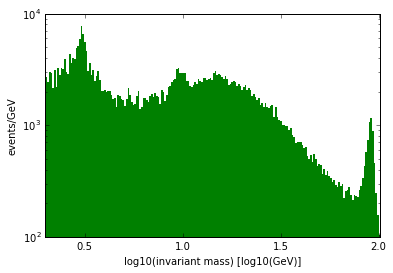

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
#plt.plot(center, hist)
plt.bar(center, hist, align='center', width=width, color='g', linewidth=0, edgecolor='none')
plt.yscale('log')
plt.xlim(np.log10(xmin), np.log10(xmax))
plt.xlabel('log10(invariant mass) [log10(GeV)]')
plt.ylabel('events/GeV')
plt.show()